In [ ]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
import random

In [ ]:
from matplotlib.colors import Colormap
metaverse = np.zeros((100 , 100))
''' random start :'''
for i in [rand.randint(30,70) for _ in range(45)] :
  for j in [rand.randint(30,70) for _ in range(45)] :
    metaverse[i , j] = 1

In [ ]:
def num_Alive(metaverse : np.array , sel_ind : tuple ):
  alive = 0
  l0 = metaverse.shape[0]
  l1 = metaverse.shape[1] 

  for i in [-1 ,0 ,1]:
    for j in [-1 ,0 ,1]:
      i = -sel_ind[0] if sel_ind[0] + i == l0 else i
      j = -sel_ind[1] if sel_ind[1] + j == l1 else j
      if (i or j != 0) and (metaverse[sel_ind[0] + i , sel_ind[1] +j] == 1):
        alive += 1

  return alive

def pass_time(metaverse : np.array , times = None) -> np.array:

      '''calculat the number of neighborhoods ''' 
      num_neighbors_map = np.zeros(metaverse.shape)


      
      for i in range(metaverse.shape[0]):
        for j in range(metaverse.shape[1]):
          num_neighbors_map[i , j] = num_Alive(metaverse , (i , j))




      '''process the roles'''
      new_metaverse = np.array(metaverse.shape)
  
      alive = (metaverse == 1) & ((num_neighbors_map == 2) | (num_neighbors_map == 3))
      new_live = (metaverse == 0) & (num_neighbors_map == 3)
      new_metaverse = (alive == 1) | (new_live == 1)
      
      return new_metaverse

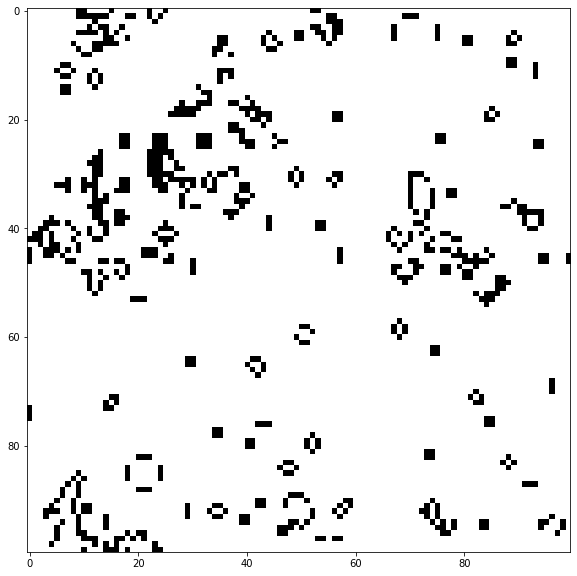

In [ ]:
new_metaverse = metaverse
for i in range(100):
  new_metaverse = pass_time(new_metaverse)
  plt.figure(figsize = (10 , 10))
  plt.imshow(new_metaverse , cmap='Greys')
  plt.show()
  #sleep(0.01)
  clear_output(wait = True)
  
'''for to be ccountinu with teh last secuence'''
metaverse = new_metaverse

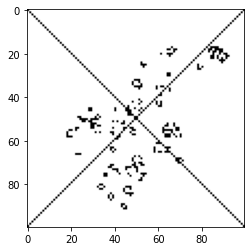

In [ ]:
def set_diameter(metaverse):
  #metaverse = np.zeros((100 , 100))
  for i in range(metaverse.shape[0]):
     metaverse[i , i] = 1
     metaverse[i , (metaverse.shape[0] - 1) - i] = 1
  return metaverse
metaverse = set_diameter(metaverse)
plt.imshow(metaverse , cmap='Greys')

In [ ]:
def set_rand_start():
  #metaverse = np.zeros((20 , 20))
  for i in [rand.randint(5,35) for _ in range(15)] :
   for j in [rand.randint(5,35) for _ in range(15)] :
     metaverse[i , j] = 1

  return metaverse

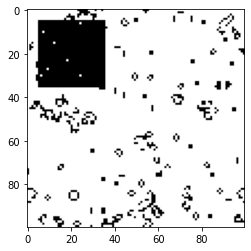

In [ ]:
for _ in range(5):  
  clear_output(wait = True)
  metaverse = set_rand_start()
  plt.imshow(metaverse , cmap = 'Greys')
  plt.show()